In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.graph_objects as go
import matplotlib.cm as cm
from matplotlib import rcParams
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
file_path = 'input/iphone.csv'
df=pd.read_csv(file_path)

In [3]:
df.head()

productAsin country        date  isVerified  ratingScore  \
0  B09G9BL5CP   India  11-08-2024        True            4   
1  B09G9BL5CP   India  16-08-2024        True            5   
2  B09G9BL5CP   India  14-05-2024        True            4   
3  B09G9BL5CP   India  24-06-2024        True            5   
4  B09G9BL5CP   India  18-05-2024        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   
4             Good product         Happy to get the iPhone 13 in Amazon offer   

                                           reviewUrl  \
0  https://www.amazon.in/gp/customer-reviews/R345...   
1  https://www.amazon.in/gp/customer-reviews/R2HJ...   
2  https://www.amazon.in/gp/customer-reviews/R3Y7...   
3  https://www.amazon.in/gp/customer-reviews/R1P9...   
4  https://www.amazon.in/gp/customer-reviews/R1XI...   

                            reviewedIn                       variant  \
0  Reviewed in India on 11 August 2024  Colour: MidnightSize: 256 GB   
1  Reviewed in India on 16 August 2024  Colour: MidnightSize: 256 GB   
2     Reviewed in India on 14 May 2024  Colour: MidnightSize: 256 GB   
3    Reviewed in India on 24 June 2024  Colour: MidnightSize: 256 GB   
4     Reviewed in India on 18 May 2024  Colour: MidnightSize: 256 GB   

  variantAsin  
0  B09G9BQS98  
1  B09G9BQS98  
2  B09G9BQS98  
3  B09G9BQS98  
4  B09G9BQS98

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


In [5]:
df.dtypes

productAsin          object
country              object
date                 object
isVerified             bool
ratingScore           int64
reviewTitle          object
reviewDescription    object
reviewUrl            object
reviewedIn           object
variant              object
variantAsin          object
dtype: object

In [6]:
df.describe()

ratingScore
count  3062.000000
mean      3.758981
std       1.579033
min       1.000000
25%       3.000000
50%       5.000000
75%       5.000000
max       5.000000

In [7]:
df.isnull().sum()

productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64

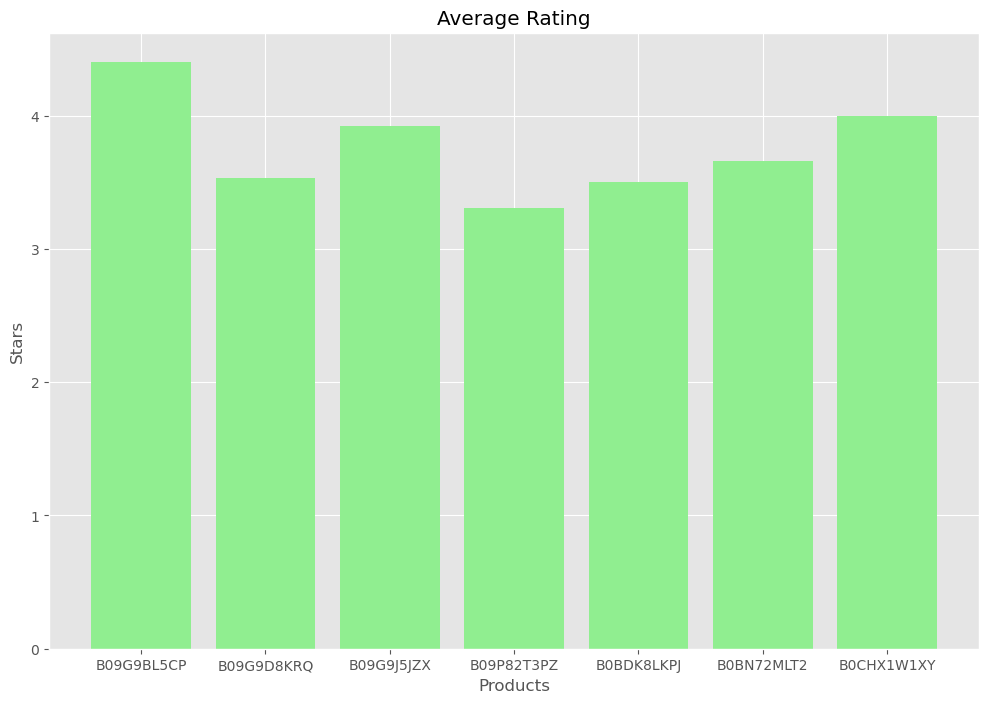

In [8]:
plt.figure(figsize=(12,8 ))
average_price_by_make = df.groupby('productAsin')['ratingScore'].mean()
plt.bar(average_price_by_make.index, average_price_by_make.values,color='lightgreen')
plt.title('Average Rating')
plt.xlabel('Products')
plt.ylabel('Stars')
plt.show()

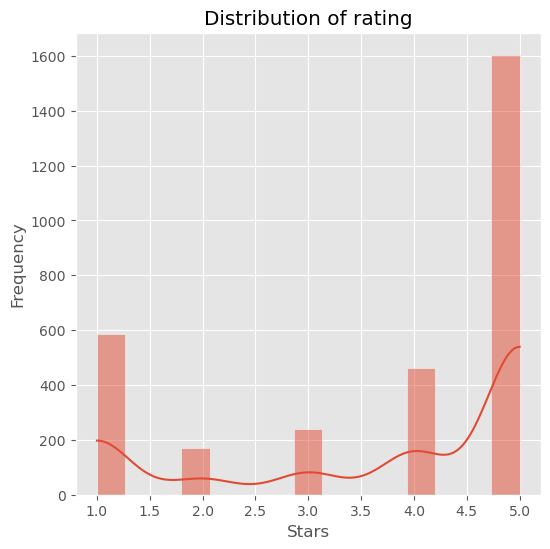

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.figure(figsize=(6, 6))
sns.histplot(df['ratingScore'], kde=True)
plt.title('Distribution of rating')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

productAsin
B09G9D8KRQ    30.89
B0BN72MLT2    19.40
B09G9BL5CP    19.17
B0BDK8LKPJ    14.08
B0CHX1W1XY     8.65
B09P82T3PZ     5.16
B09G9J5JZX     2.65
Name: count, dtype: float64


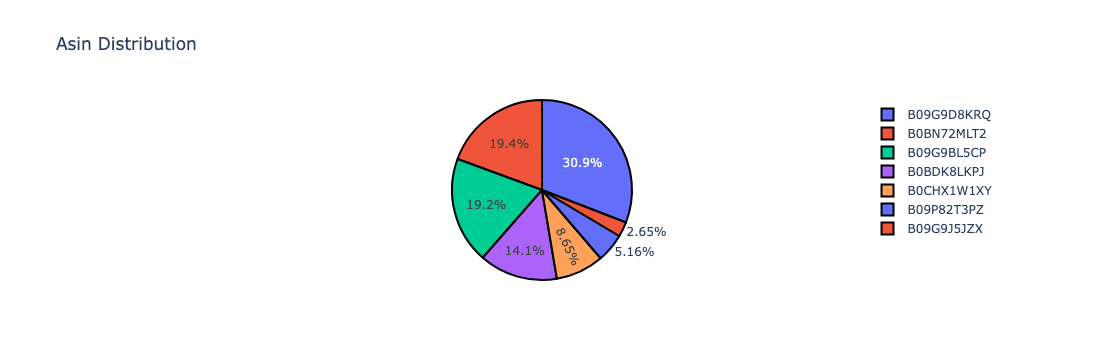

In [10]:
Asin = round(df["productAsin"].value_counts() / len(df["productAsin"]) * 100,2)

print(Asin)

labels = list(Asin.index)
values = Asin.values.tolist()
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']
Asin_pie = go.Pie(labels=labels, values=values, 
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))
layout = go.Layout(title='Asin Distribution')
fig = go.Figure(data=[Asin_pie], layout=layout)
fig.show()

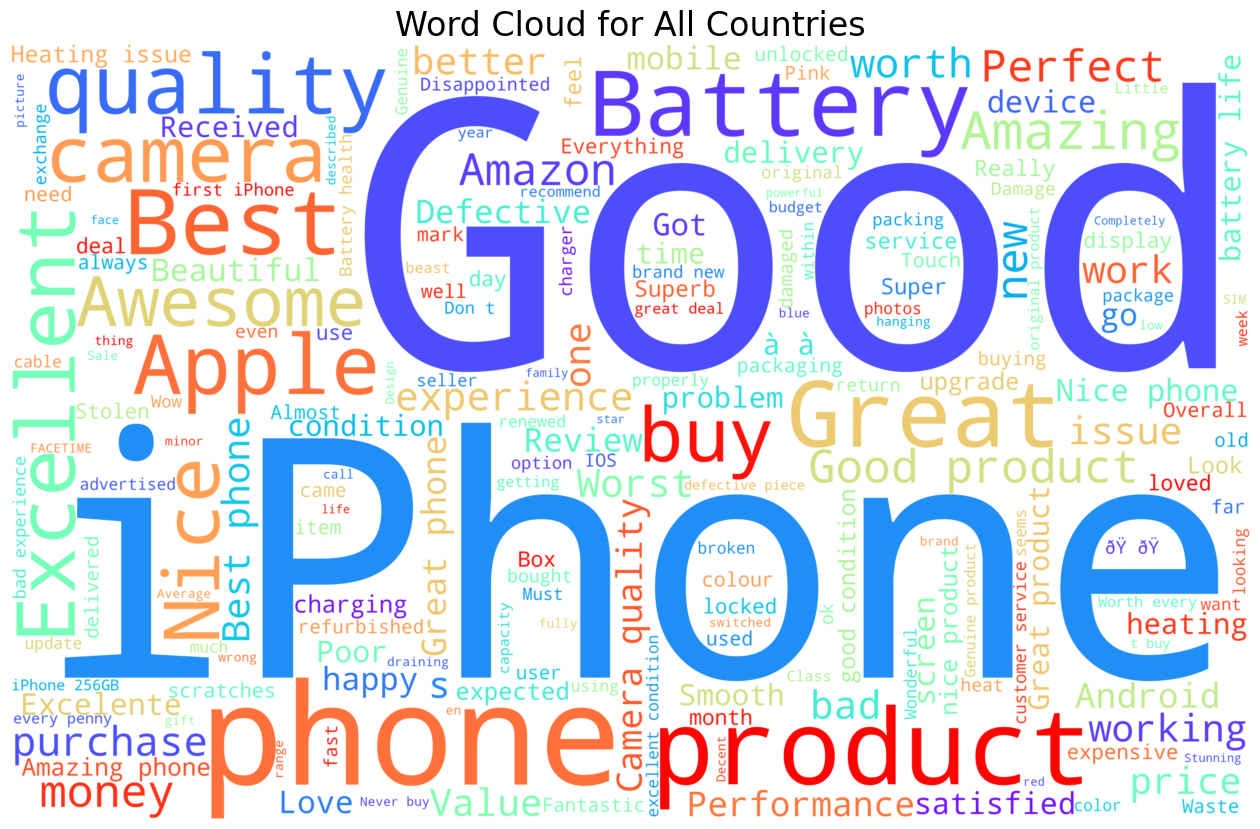

In [11]:
# Combine all review titles into one large string
all_reviews = ' '.join(df['reviewTitle'])

# Clean the combined text (optional, depending on your data)
cleaned_text = " ".join([word for word in all_reviews.split()])

# Generate the word cloud for all countries
wordcloud = WordCloud(stopwords=STOPWORDS,  # Remove common stopwords
                      background_color='white',  # Set background color
                      colormap='rainbow',        # Set the color map
                      width=4000,                # Set the width of the canvas
                      height=2500                # Set the height of the canvas
                     ).generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(16, 12))
plt.title('Word Cloud for All Countries', fontsize=24)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove the axis
plt.show()

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores for each review
def get_sentiment(text):
    return analyzer.polarity_scores(text)

# Apply the sentiment analysis to the 'reviewTitle' column
df['sentiment'] = df['reviewTitle'].apply(get_sentiment)

# Display the sentiment for each review
df[['reviewTitle', 'sentiment']].head()

reviewTitle                                          sentiment
0               No charger  {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...
1          iPhone 13 256GB  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2  Flip camera option nill  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3                  Product  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4             Good product  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...

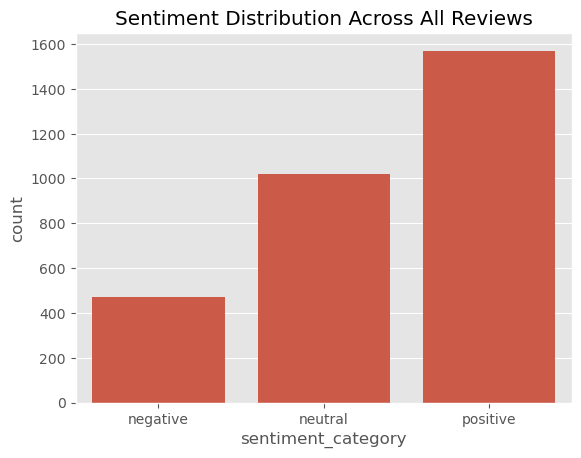

In [15]:
# Worldwide
# Extract compound sentiment score and categorize it
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))

# Plot the sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment_category', data=df)
plt.title('Sentiment Distribution Across All Reviews')
plt.show()

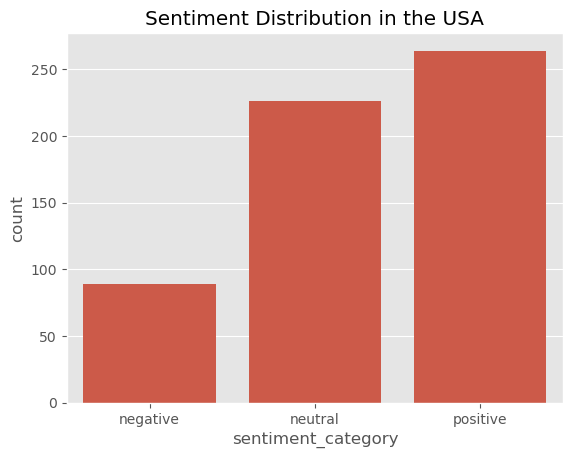

In [19]:
# USA
# Filter the dataset for reviews from the USA
df_usa = df[df['country'] == 'United States']

# Plot sentiment distribution for the USA
sns.countplot(x='sentiment_category', data=df_usa, order=['negative', 'neutral', 'positive'])
plt.title('Sentiment Distribution in the USA')
plt.show()

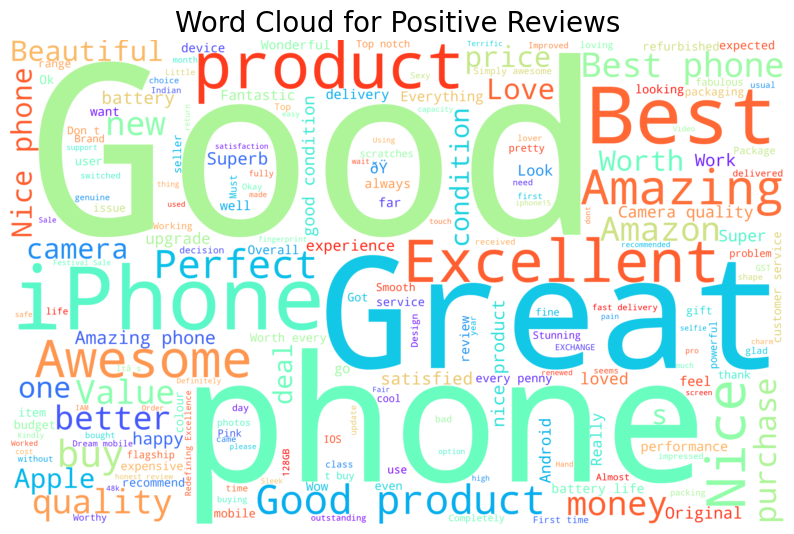

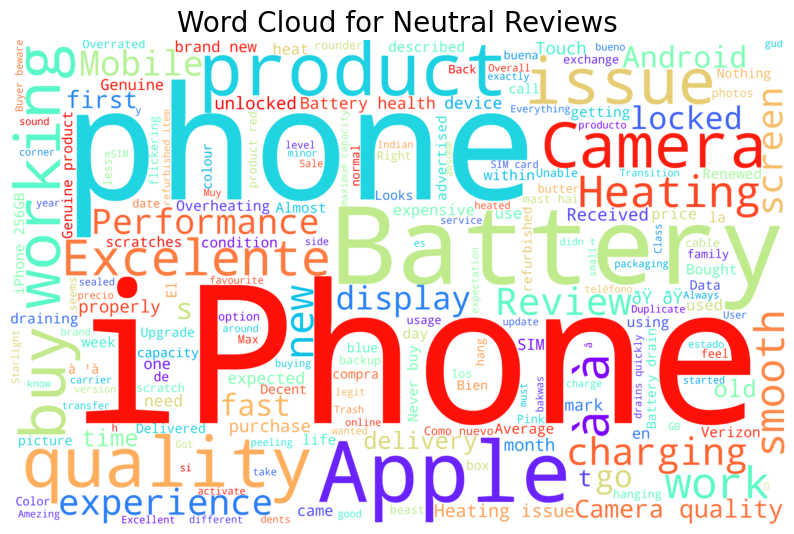

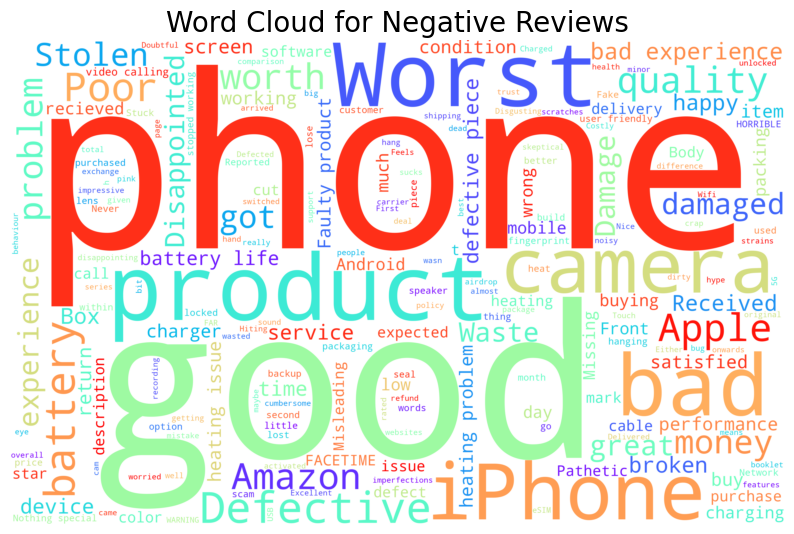

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Function to generate word clouds for each sentiment category
def generate_wordcloud(df, sentiment_category, title):
    # Filter the reviews based on sentiment category
    filtered_df = df[df['sentiment_category'] == sentiment_category]

    # Combine all review titles into one large string
    words = ' '.join(filtered_df['reviewTitle'])
    cleaned_words = " ".join([word for word in words.split()])

    # Generate the word cloud
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          colormap='rainbow',
                          width=4000,
                          height=2500
                         ).generate(cleaned_words)

    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.title(title, fontsize=20)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment category
generate_wordcloud(df, 'positive', 'Word Cloud for Positive Reviews')
generate_wordcloud(df, 'neutral', 'Word Cloud for Neutral Reviews')
generate_wordcloud(df, 'negative', 'Word Cloud for Negative Reviews')